In [20]:
import tensorflow as tf
import tensorflow.keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(100, activation='sigmoid', batch_input_shape=(None, 4))) #We have 4 input features
#...
model.add(Dense(1, activation='sigmoid'))
opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=opt,
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               500       
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


Imports

In [21]:
import tensorflow as tf
import tensorflow.keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Normalization
from tensorflow.keras.layers import Dropout

import pandas as pd

import numpy as np

# Nice function to split a known data set to a test and trin set
from sklearn.model_selection import train_test_split

# Nice function for plotting
# Install via pip: pip install tensorflow-history-plot
from tensorflow_history_plot import show_acc

Reading data out of train.csv file

In [22]:
train_data = pd.read_csv("data/train.csv")
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Data preparation

In [23]:
# Read data again in case you have already manipulated it
train_data = pd.read_csv("data/train.csv") 

# Fill missing age in train data
train_data["Age"].fillna(train_data["Age"].median(skipna=True), inplace=True) 

# Define features we want to use
features = ["Pclass", "Survived", "Sex", "Age"]

# Get the features we want to use
train_data = pd.get_dummies(train_data[features])
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Survived    891 non-null    int64  
 2   Age         891 non-null    float64
 3   Sex_female  891 non-null    bool   
 4   Sex_male    891 non-null    bool   
dtypes: bool(2), float64(1), int64(2)
memory usage: 22.7 KB


Split data into validation and trainings set

In [24]:
X = train_data.drop('Survived', axis=1, inplace=False)  # input data
y = train_data['Survived']  # validation data

print(f'Input features shape: {X.shape}')
print(f'Labels shape: {y.shape}')

Input features shape: (891, 4)
Labels shape: (891,)


In [25]:
X_train, X_val, y_train,y_val  = train_test_split(X, y, test_size=0.2, random_state=42)

Convert Data into float32 types 

In [26]:
X_train = np.asarray(X_train).astype('float32')
X_val = np.asarray(X_val).astype('float32')
y_train = np.asarray(y_train).astype('float32')
y_val = np.asarray(y_val).astype('float32')

Define neural network

In [27]:
model = Sequential()

Add the layers to the model

In [28]:
model.add(Dense(125, activation='sigmoid', batch_input_shape=(None, 4), name="Layer_1")) #We have 4 input features
model.add(Dense(500, activation='sigmoid', name="Layer_2"))
model.add(Dense(750, activation='sigmoid', name="Layer_3"))
model.add(Dense(1, activation='sigmoid', name="Layer_4"))

# Ask lecturer why this is not possible???
#model.add(Dense(1, activation="softmax", name="Layer_5"))

opt = tf.keras.optimizers.Adam(learning_rate=1e-3)

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=opt,
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Dense)             (None, 125)               625       
                                                                 
 Layer_2 (Dense)             (None, 500)               63000     
                                                                 
 Layer_3 (Dense)             (None, 750)               375750    
                                                                 
 Layer_4 (Dense)             (None, 1)                 751       
                                                                 
Total params: 440,126
Trainable params: 440,126
Non-trainable params: 0
_________________________________________________________________


train the model

In [29]:
#history = model.fit(x, y, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    batch_size=32)

Epoch 1/50
23/23 [==============================] - 1s 8ms/step - loss: 0.7479 - accuracy: 0.5070 - val_loss: 0.6995 - val_accuracy: 0.5866
Epoch 2/50
23/23 [==============================] - 0s 3ms/step - loss: 0.6708 - accuracy: 0.6236 - val_loss: 0.6713 - val_accuracy: 0.5978
Epoch 3/50
23/23 [==============================] - 0s 3ms/step - loss: 0.6597 - accuracy: 0.6320 - val_loss: 0.6766 - val_accuracy: 0.6425
Epoch 4/50
23/23 [==============================] - 0s 3ms/step - loss: 0.6877 - accuracy: 0.6096 - val_loss: 0.6685 - val_accuracy: 0.6592
Epoch 5/50
23/23 [==============================] - 0s 3ms/step - loss: 0.6811 - accuracy: 0.5955 - val_loss: 0.7103 - val_accuracy: 0.5922
Epoch 6/50
23/23 [==============================] - 0s 4ms/step - loss: 0.6745 - accuracy: 0.6025 - val_loss: 0.6914 - val_accuracy: 0.5978
Epoch 7/50
23/23 [==============================] - 0s 4ms/step - loss: 0.6373 - accuracy: 0.6447 - val_loss: 0.6266 - val_accuracy: 0.5978
Epoch 8/50
23/23 [==

Plot the loss and accuracy

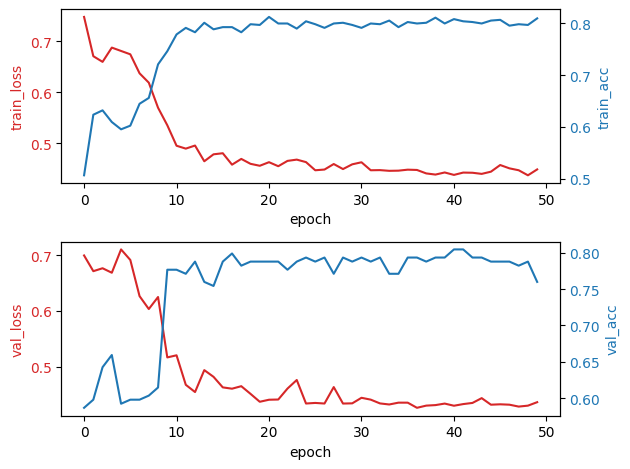

In [30]:
show_acc.plot(history)